In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import json
from datasets import load_dataset


dataset = load_dataset("gsm8k", "main")
train_questions = np.array(dataset["train"]["question"])
train_answers = np.array(dataset["train"]['answer'])

test_questions = np.array(dataset["test"]["question"])
test_answers = np.array(dataset["test"]['answer'])


/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
num_memorized_all = []
num_correct_different_all = []
num_incorrect_all = []

# ckpts = ["58", "116", "175", "233", "292", "348"]
ckpts = ["116", "232", "348", "464", "580", "696"]

train_name = "gsm8k_orig_12epochs_full_lr5e-07_bs128"



for ckpt in ckpts:
    train_correct = (np.load("ckpts/"+train_name+"/checkpoint-"+ckpt+ "/train_answer_types5_seed2.npy")==0)
    train_samples = (np.load("ckpts/"+train_name+"/checkpoint-"+ckpt+ "/train_answers5_seed2.npy"))

    num_memorized_ckpt = []
    num_correct_different_ckpt = []
    num_incorrect_ckpt = []

    for input_idx in range(len(train_questions)):
        num_memorized = 0
        num_correct_different = 0
        num_incorrect = 0
        for sample_idx in range(5):
            correct = train_correct[input_idx, sample_idx]
            if correct:
                if train_samples[input_idx][sample_idx].strip() == train_answers[input_idx].strip():
                    num_memorized+=1
                else:
                    num_correct_different+=1
            else:
                num_incorrect+=1 
        num_memorized_ckpt.append(num_memorized)
        num_correct_different_ckpt.append(num_correct_different)
        num_incorrect_ckpt.append(num_incorrect)
    
    num_memorized_all.append(num_memorized_ckpt)
    num_correct_different_all.append(num_correct_different_ckpt)
    num_incorrect_all.append(num_incorrect_ckpt)
    
num_memorized_all = np.array(num_memorized_all)
num_correct_different_all = np.array(num_correct_different_all)
num_incorrect_all = np.array(num_incorrect_all)

In [4]:
def get_n_mean(arr, n):
    o = []
    for i in range(30):
        idxs = np.random.choice(arr.shape[-1], n, replace=False)
        o.append(arr[:, idxs].max(axis=1).mean())
    return o

In [5]:
bo1s = []
bo5s = []
bo10s = []
bo50s = []

for ckpt in ckpts:
    test_accs = (np.load("ckpts/"+train_name+"/checkpoint-"+ckpt+ "/test_answer_types50_seed2.npy")==0)
    bo1 = get_n_mean(test_accs, 1)
    bo5 = get_n_mean(test_accs, 5)
    bo10 = get_n_mean(test_accs, 10)
    bo50 = get_n_mean(test_accs, 50)
    
    bo1s.append(np.mean(bo1))
    bo5s.append(np.mean(bo5))
    bo10s.append(np.mean(bo10))
    bo50s.append(np.mean(bo50))

In [208]:
bo50s

[0.9325246398786962,
 0.9514783927217593,
 0.9492039423805916,
 0.947687642153146,
 0.9446550416982559,
 0.9378316906747534]

In [8]:
train_name = "gsm8k_orig_6epochs_full_lr2e-05_bs128"
bo1s = []
bo5s = []
bo10s = []
bo50s = []
ckpts = ["58", "116", "175", "233", "292", "348"]


for ckpt in ckpts:
    test_accs = (np.load("ckpts/"+train_name+"/checkpoint-"+ckpt+ "/test_answer_types50_seed2.npy")==0)
    bo1 = get_n_mean(test_accs, 1)
    bo5 = get_n_mean(test_accs, 5)
    bo10 = get_n_mean(test_accs, 10)
    bo50 = get_n_mean(test_accs, 50)
    
    bo1s.append(np.mean(bo1))
    bo5s.append(np.mean(bo5))
    bo10s.append(np.mean(bo10))
    bo50s.append(np.mean(bo50))

print(bo1s)
print(bo50s)

[0.4283295425827648, 0.4809957038160223, 0.5135961587060904, 0.5168562041950974, 0.5263330806166288, 0.5464240586302755]
[0.9120545868081883, 0.9196360879454132, 0.9112964366944651, 0.9211523881728579, 0.9135708870356329, 0.9120545868081883]


In [9]:
train_name = "gsm8k_orig_6epochs_full_lr5e-07_bs128"
bo1s = []
bo5s = []
bo10s = []
bo50s = []
ckpts = ["58", "116", "175", "233", "292", "348"]


for ckpt in ckpts:
    test_accs = (np.load("ckpts/"+train_name+"/checkpoint-"+ckpt+ "/test_answer_types50_seed2.npy")==0)
    bo1 = get_n_mean(test_accs, 1)
    bo5 = get_n_mean(test_accs, 5)
    bo10 = get_n_mean(test_accs, 10)
    bo50 = get_n_mean(test_accs, 50)
    
    bo1s.append(np.mean(bo1))
    bo5s.append(np.mean(bo5))
    bo10s.append(np.mean(bo10))
    bo50s.append(np.mean(bo50))

print(bo1s)
print(bo50s)

[0.2730603992923932, 0.3981551680566086, 0.47725549658832445, 0.5080869345463735, 0.5257012888551933, 0.5146828405357595]
[0.8855193328279002, 0.9325246398786962, 0.942380591357089, 0.947687642153146, 0.947687642153146, 0.9499620924943138]


/tmp/ipykernel_1331356/2808407512.py:13: RuntimeWarning: invalid value encountered in divide
  unmemorized_idxs = np.where((num_memorized_all[i]+num_correct_different_all[i] >= threshold) * (num_correct_different_all[i]/(num_memorized_all[i]+num_correct_different_all[i]) >= 0.5))
/tmp/ipykernel_1331356/2808407512.py:16: RuntimeWarning: invalid value encountered in divide
  memorized_idxs = np.where((num_memorized_all[i]+num_correct_different_all[i] >= threshold) * (num_correct_different_all[i]/(num_memorized_all[i]+num_correct_different_all[i]) < 0.5))


(0.0, 1.0)

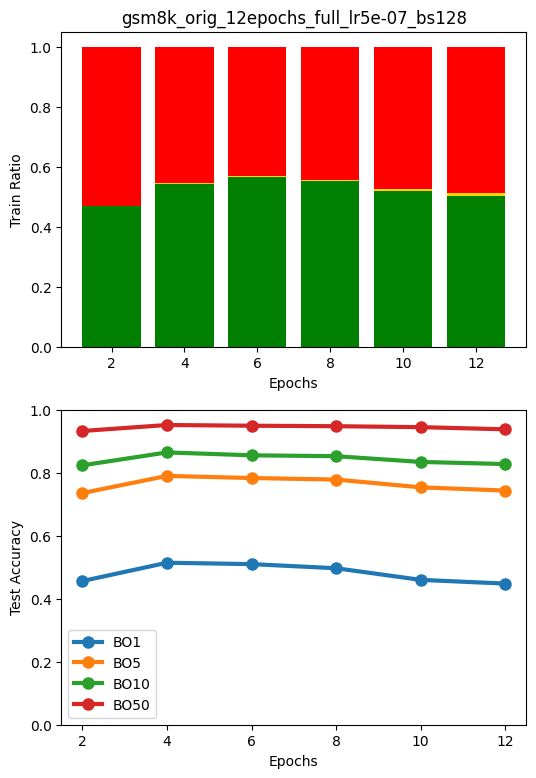

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6*1.5))


example_type = np.ones(num_incorrect_all.shape)*-1


threshold = 2.5

for i in range(6):
    incorrect_idxs = np.where(num_memorized_all[i]+num_correct_different_all[i] < threshold)
    example_type[i][incorrect_idxs] = 0 #incorrect 
    
    unmemorized_idxs = np.where((num_memorized_all[i]+num_correct_different_all[i] >= threshold) * (num_correct_different_all[i]/(num_memorized_all[i]+num_correct_different_all[i]) >= 0.5))
    example_type[i][unmemorized_idxs] = 1 #unmemorized
    
    memorized_idxs = np.where((num_memorized_all[i]+num_correct_different_all[i] >= threshold) * (num_correct_different_all[i]/(num_memorized_all[i]+num_correct_different_all[i]) < 0.5))
    prev_unmemorized_idxs = np.where((example_type[:i]==1).sum(axis=0)>0)
    
    memorized1_idxs = np.intersect1d(memorized_idxs, prev_unmemorized_idxs)
    memorized2_idxs = np.setdiff1d(memorized_idxs, prev_unmemorized_idxs)
    
    example_type[i][memorized1_idxs] = 2 #memorized
    example_type[i][memorized2_idxs] = 3 #memorized
    
    
# make 2 subplots
ratio_incorrect = (example_type == 0).mean(axis=1)
ratio_unmemorized = (example_type == 1).mean(axis=1)
ratio_memorized1 = (example_type == 2).mean(axis=1)
ratio_memorized2 = (example_type == 3).mean(axis=1)

ax1.bar([i for i in range(1, 7)], [1 for i in range(6)], color = "red", label = "Incorrect")
ax1.bar([i for i in range(1, 7)], [1-ratio_incorrect[i] for i in range(6)], color = "orange", label = "Correct Memorized")
ax1.bar([i for i in range(1, 7)], [1-ratio_incorrect[i]-ratio_memorized2[i] for i in range(6)], color = "gold", label = "Correct Unmemorized to Memorized")
ax1.bar([i for i in range(1, 7)], [1-ratio_incorrect[i]-ratio_memorized2[i]-ratio_memorized1[i] for i in range(6)], color = "green", label = "Correct Unmemorized")

ax1.set_xticks([i for i in range(1, 7)], [2*i for i in range(1, 7)])
ax1.set_ylabel("Train Ratio")
ax1.set_xlabel("Epochs")

ax1.set_title(train_name)



ax2.plot([i for i in range(1, 7)], bo1s, "o-", label = "BO1", linewidth=3, markersize=8)
ax2.plot([i for i in range(1, 7)], bo5s,  "o-",label = "BO5", linewidth=3, markersize=8)
ax2.plot([i for i in range(1, 7)], bo10s, "o-", label = "BO10", linewidth=3, markersize=8)
ax2.plot([i for i in range(1, 7)], bo50s, "o-", label = "BO50", linewidth=3, markersize=8)
ax2.set_xticks([i for i in range(1, 7)], [2*i for i in range(1, 7)])
ax2.set_ylabel("Test Accuracy")
ax2.set_xlabel("Epochs")
ax2.legend()
ax2.set_ylim(0, 1)


In [ ]:
# plot best of 1 5 10 50

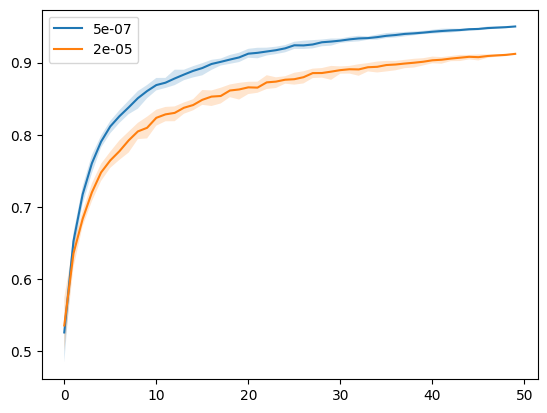

In [93]:
X = np.load("ckpts/gsm8k_orig_6epochs_full_lr5e-07_bs128/checkpoint-348/test_answer_types50_seed2.npy")==0
bon1 = np.array([get_n_mean(X, n) for n in range(1, 51)])


plt.plot(bon1.mean(1), label="5e-07")
plt.fill_between(np.arange(50), np.percentile(bon1, 10, axis=-1), np.percentile(bon1, 90, axis=-1), alpha=0.2) 



X = np.load("ckpts/gsm8k_orig_6epochs_full_lr2e-05_bs128/checkpoint-348/test_answer_types50_seed2.npy")==0
bon1 = np.array([get_n_mean(X, n) for n in range(1, 51)])


plt.plot(bon1.mean(1), label="2e-05")
plt.fill_between(np.arange(50), np.percentile(bon1, 10, axis=-1), np.percentile(bon1, 90, axis=-1), alpha=0.2) 


plt.legend()

Text(0.5, 1.0, 'GSM8k full 6 epochs BS 128')

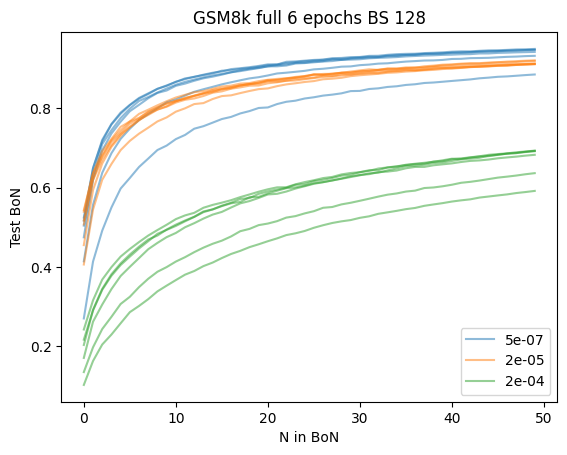

In [29]:
ckpts = ["58", "116", "175", "233", "292", "348"]


for ckpt in ckpts:
    X = np.load("ckpts/gsm8k_orig_6epochs_full_lr5e-07_bs128/checkpoint-"+ckpt+"/test_answer_types50_seed2.npy")==0
    bon1 = np.array([get_n_mean(X, n) for n in range(1, 51)])

    if ckpt == "58":
        plt.plot(bon1.mean(1), label="5e-07", color="C0", alpha=0.5)
    else:
        plt.plot(bon1.mean(1), color="C0", alpha=0.5)


for ckpt in ckpts:
    X = np.load("ckpts/gsm8k_orig_6epochs_full_lr2e-05_bs128/checkpoint-"+ckpt+"/test_answer_types50_seed2.npy")==0
    bon1 = np.array([get_n_mean(X, n) for n in range(1, 51)])


    if ckpt == "58":
        plt.plot(bon1.mean(1), label="2e-05", color="C1", alpha=0.5)
    else:
        plt.plot(bon1.mean(1), color="C1", alpha=0.5)
    

for ckpt in ckpts:
    X = np.load("ckpts/gsm8k_orig_6epochs_full_lr0.0002_bs128/checkpoint-"+ckpt+"/test_answer_types50_seed2.npy")==0
    bon1 = np.array([get_n_mean(X, n) for n in range(1, 51)])

    if ckpt == "58":
        plt.plot(bon1.mean(1), label="2e-04", color="C2", alpha=0.5)
    else:
        plt.plot(bon1.mean(1), color="C2", alpha=0.5)


# ckpts = ["116", "232", "348", "464", "580", "696"]


# for ckpt in ckpts:
#     X = np.load("ckpts/gsm8k_orig_12epochs_full_lr5e-07_bs128/checkpoint-"+ckpt+"/test_answer_types50_seed2.npy")==0
#     bon1 = np.array([get_n_mean(X, n) for n in range(1, 51)])

#     if ckpt == "58":
#         plt.plot(bon1.mean(1), label="2e-04", color="C3", alpha=0.5)
#     else:
#         plt.plot(bon1.mean(1), color="C4", alpha=0.5)



plt.legend()


plt.xlabel("N in BoN")
plt.ylabel("Test BoN")

plt.title("GSM8k full 6 epochs BS 128")

In [192]:
import openai

# Set your OpenAI API key
# openai.api_key = 

# load text file
with open("/data/katie_kang/openai_key_file_rail.txt", "r") as f:
    openai.api_key = f.read().strip()

def query_gpt4(prompt, model="gpt-4o"):
    try:
        response = openai.ChatCompletion.create(
            model=model,
            messages=[
                # {"role": "system", "content": "You are a helpful assistant."},
                {"role": "system", "content": "Answer Question 3 using the same format as Answer 1 and 2."},
                {"role": "user", "content": prompt},
            ],
            max_tokens=200,  # You can adjust the max tokens as needed
            temperature=0.,  # Adjust the creativity level
        )
        
        response_content = response['choices'][0]['message']['content']

        # Get usage data
        usage = response['usage']
        prompt_tokens = usage['prompt_tokens']
        completion_tokens = usage['completion_tokens']
        total_tokens = usage['total_tokens']
        
        cost = usage['total_tokens'] *5 / 1000000
        
        print(f"Prompt tokens: {prompt_tokens}")
        print(f"Completion tokens: {completion_tokens}")
        print(f"Total tokens: {total_tokens}")
        print(f"Cost: ${cost}")
        
        
        
        
        return response['choices'][0]['message']['content']
    except Exception as e:
        return f"Error: {e}"

# Example usage

train_question_idx = 192

prompt = f'''
Question1: Janet’s ducks lay 16 eggs per day. She eats three for breakfast every morning and bakes muffins for her friends every day with four. She sells the remainder at the farmers' market daily for $2 per fresh duck egg. How much in dollars does she make every day at the farmers' market?
Answer1: Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eggs a day.\nShe makes 9 * 2 = $<<9*2=18>>18 every day at the farmer’s market.\n#### 18

Question2: A robe takes 2 bolts of blue fiber and half that much white fiber.  How many bolts in total does it take?
Answer2: It takes 2/2=<<2/2=1>>1 bolt of white fiber\nSo the total amount of fabric is 2+1=<<2+1=3>>3 bolts of fabric\n#### 3

Question3: {train_questions[train_question_idx]}'''
response = query_gpt4(prompt)

print(train_questions[train_question_idx])
print("\nGPT4")
print(response)


print("\nGround Truth")
print(train_answers[train_question_idx])

Prompt tokens: 293
Completion tokens: 181
Total tokens: 474
Cost: $0.00237
Apple sold 100 iPhones at their New York store today for an average cost of $1000. They also sold 20 iPads for an average cost of $900 and 80 Apple TVs for an average cost of $200. What was the average cost across all products sold today?

GPT4
Answer3: Apple sold a total of 100 + 20 + 80 = <<100+20+80=200>>200 products today.
The total revenue from iPhones is 100 * 1000 = $<<100*1000=100000>>100,000.
The total revenue from iPads is 20 * 900 = $<<20*900=18000>>18,000.
The total revenue from Apple TVs is 80 * 200 = $<<80*200=16000>>16,000.
The total revenue from all products is 100,000 + 18,000 + 16,000 = $<<100000+18000+16000=134000>>134,000.
The average cost across all products sold today is 134,000 / 200 = $<<134000/200=670>>670.
#### 670

Ground Truth
The sales for iPhones were 100 iPhones * $1000 per iPhone on average = $<<100*1000=100000>>100,000
The sales for iPads today were 20 iPads * $900 per iPad = $<<

In [193]:
0.00237*7000

16.59

In [175]:
4*7000/60/60

7.777777777777778

In [156]:
response

"Answer3: Let's denote the number of people on the first ship as x. Then the number of people on the second ship is 2x, and on the third ship is 2*2x = 4x. \nSo, x + 2x + 4x = 847.\nThat means 7x = 847.\nSo, the number of people on the first ship is x = 847 / 7 = <<847/7=121>>121.\n#### 121"

In [140]:
test_questions[1]

'A robe takes 2 bolts of blue fiber and half that much white fiber.  How many bolts in total does it take?'

In [109]:
test_answers[1]

'It takes 2/2=<<2/2=1>>1 bolt of white fiber\nSo the total amount of fabric is 2+1=<<2+1=3>>3 bolts of fabric\n#### 3'

In [129]:
print(train_questions[5])

Mark has a garden with flowers. He planted plants of three different colors in it. Ten of them are yellow, and there are 80% more of those in purple. There are only 25% as many green flowers as there are yellow and purple flowers. How many flowers does Mark have in his garden?


In [128]:
print(train_answers[5])

There are 80/100 * 10 = <<80/100*10=8>>8 more purple flowers than yellow flowers.
So in Mark's garden, there are 10 + 8 = <<10+8=18>>18 purple flowers.
Purple and yellow flowers sum up to 10 + 18 = <<10+18=28>>28 flowers.
That means in Mark's garden there are 25/100 * 28 = <<25/100*28=7>>7 green flowers.
So in total Mark has 28 + 7 = <<28+7=35>>35 plants in his garden.
#### 35
